In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from xgboost import XGBClassifier, XGBRegressor
import warnings
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, mean_squared_error
import matplotlib.pyplot as plt
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
import catboost
from catboost import *
from catboost import CatBoostClassifier

# Задание

Решите задачу с данными train_small.csv, test_small.csv с помощью CatBoost, xgboost и LightGBM. Найдите оптимальные параметры. Сравните скорость обучения и качество. 

### CatBoost

In [2]:
X_train = pd.read_csv('train_small.csv')
X_test = pd.read_csv('test_small.csv')

ytrain = X_train['Disbursed']
Xtrain = X_train.copy()
del Xtrain['Disbursed']

ytest = X_test['Disbursed']
Xtest = X_test.copy()
del Xtest['Disbursed']

In [3]:
X_train = X_train.drop('Unnamed: 0', axis=1)
X_test = X_test.drop('Unnamed: 0', axis=1)

In [4]:
X_train.sample(5)

,Existing_EMI,Loan_Amount_Applied,Loan_Tenure_Applied,Monthly_Income,Var4,Var5,Age,EMI_Loan_Submitted_Missing,Interest_Rate_Missing,Loan_Amount_Submitted_Missing,...,Var2_3,Var2_4,Var2_5,Var2_6,Mobile_Verified_0,Mobile_Verified_1,Source_0,Source_1,Source_2,Disbursed
802,3666.0,200000.0,4.0,40000,5,15,25,0,0,0,...,0,0,0,0,0,1,0,1,0,0.0
19287,0.0,30000.0,3.0,30000,1,0,27,1,1,1,...,0,0,0,0,1,0,0,1,0,0.0
16065,0.0,1000000.0,5.0,17350,5,1,51,0,0,0,...,0,0,0,0,0,1,0,0,1,0.0
247,12000.0,500000.0,5.0,23007,1,0,31,1,1,1,...,0,0,0,0,1,0,0,1,0,0.0
6404,0.0,500000.0,5.0,30000,3,12,32,1,1,0,...,0,0,0,1,0,1,1,0,0,0.0


In [5]:
X_test.sample(5)

,Existing_EMI,Loan_Amount_Applied,Loan_Tenure_Applied,Monthly_Income,Var4,Var5,Age,EMI_Loan_Submitted_Missing,Interest_Rate_Missing,Loan_Amount_Submitted_Missing,...,Var2_3,Var2_4,Var2_5,Var2_6,Mobile_Verified_0,Mobile_Verified_1,Source_0,Source_1,Source_2,Disbursed
539,0.0,0.0,0.0,37000,3,5,38,1,1,0,...,0,0,0,0,0,1,0,1,0,0.0
9185,3500.0,150000.0,5.0,10000,1,0,35,1,1,1,...,0,0,0,1,1,0,1,0,0,0.0
8468,0.0,50000.0,3.0,20000,1,0,29,1,1,1,...,0,0,0,0,1,0,0,1,0,0.0
5132,2800.0,30000.0,1.0,12000,1,0,26,1,1,1,...,0,0,0,0,1,0,0,1,0,0.0
9640,15000.0,500000.0,5.0,25200,1,0,28,1,1,1,...,0,0,0,0,1,0,0,1,0,0.0


In [6]:
cat_features = list(range(0, X_train.shape[1]))
print(cat_features)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


In [7]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(
    iterations=5,
    learning_rate=0.1,
)
model.fit(
    Xtrain, ytrain,
    
    eval_set=(Xtest, ytest),  # то же самое что train test
    verbose=False # T many comments F no comments
)
print('Model is fitted: ' + str(model.is_fitted()))
print('Model params:')
print(model.get_params())

Model is fitted: True
Model params:
{'iterations': 5, 'learning_rate': 0.1}


In [8]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(
    iterations=150,
#     verbose=5,
)
model.fit(
    Xtrain, ytrain,
    
    eval_set=(Xtest, ytest),
    verbose = 3 # уровень подробностей
)

Learning rate set to 0.159162
0:	learn: 0.4208521	test: 0.4212519	best: 0.4212519 (0)	total: 12.6ms	remaining: 1.88s
3:	learn: 0.1261445	test: 0.1269266	best: 0.1269266 (3)	total: 42.7ms	remaining: 1.56s
6:	learn: 0.0836921	test: 0.0848594	best: 0.0848594 (6)	total: 65.7ms	remaining: 1.34s
9:	learn: 0.0725179	test: 0.0737662	best: 0.0737662 (9)	total: 90.4ms	remaining: 1.26s
12:	learn: 0.0687823	test: 0.0703396	best: 0.0703396 (12)	total: 117ms	remaining: 1.23s
15:	learn: 0.0661476	test: 0.0685035	best: 0.0685035 (15)	total: 142ms	remaining: 1.19s
18:	learn: 0.0644855	test: 0.0676408	best: 0.0676408 (18)	total: 166ms	remaining: 1.15s
21:	learn: 0.0634522	test: 0.0671344	best: 0.0671344 (21)	total: 189ms	remaining: 1.1s
24:	learn: 0.0624117	test: 0.0670450	best: 0.0670450 (24)	total: 215ms	remaining: 1.07s
27:	learn: 0.0615167	test: 0.0668694	best: 0.0668694 (27)	total: 246ms	remaining: 1.07s
30:	learn: 0.0606044	test: 0.0669816	best: 0.0668694 (27)	total: 270ms	remaining: 1.03s
33:	lea

In [9]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(
    iterations=50,
    random_seed=63,
    learning_rate=0.5,
    custom_loss=['AUC', 'Accuracy']
)
model.fit(
    Xtrain, ytrain,
    
    eval_set=(Xtest, ytest),
    verbose=False,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [10]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(
    iterations=100,
    random_seed=63,
    learning_rate=0.5,
#    use_best_model=False     без этого даёт лучшее кол-во деревьев
)
model.fit(
    Xtrain, ytrain,
    
    eval_set=(Xtest, ytest),
    verbose=False,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [11]:
print('Tree count: ' + str(model.tree_count_))

Tree count: 8


In [12]:
# кроссс-валидация
from catboost import cv

params = {}
params['loss_function'] = 'Logloss'
params['iterations'] = 80
params['custom_loss'] = 'AUC'
params['random_seed'] = 63
params['learning_rate'] = 0.5

cv_data = cv(
    params = params,
    pool = Pool(Xtrain, label=ytrain),
    fold_count=5,
    shuffle=True,
    partition_random_seed=0,
    stratified=False,
    verbose=False,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.07037497766
bestIteration = 16

Training on fold [1/5]

bestTest = 0.06109181959
bestIteration = 27

Training on fold [2/5]

bestTest = 0.06970297903
bestIteration = 7

Training on fold [3/5]

bestTest = 0.06278707733
bestIteration = 5

Training on fold [4/5]

bestTest = 0.07776499388
bestIteration = 3



### LightGBM

In [102]:
import numpy as np
import pandas as pd
import lightgbm as lgb
import warnings

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

#from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

'''with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    data = pd.read_csv('BostonHousing.csv')
X_full = data.data
y_full = data.target'''



'with warnings.catch_warnings():\n    warnings.filterwarnings("ignore")\n    data = pd.read_csv(\'BostonHousing.csv\')\nX_full = data.data\ny_full = data.target'

In [103]:
test = pd.read_csv('train_small.csv')
train = pd.read_csv('test_small.csv')

df = pd.concat([test, train])

df = df.drop('Unnamed: 0', axis=1)
X = df.drop('Disbursed', axis=1) # x.values
y = df['Disbursed']

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=100, 
                                        random_state=241)

In [105]:
print('Starting training...')
# train
gbm = lgb.LGBMRegressor(num_leaves=31,
                        learning_rate=0.05,
                        n_estimators=20)
gbm.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric='l1',)

Starting training...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002605 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 779
[LightGBM] [Info] Number of data points in the train set: 34708, number of used features: 47
[LightGBM] [Info] Start training from score 0.015126


LGBMRegressor(learning_rate=0.05, n_estimators=20)

In [106]:
print('Starting predicting...')

y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration_)

print('The rmse of prediction is:', mean_squared_error(y_test, y_pred) ** 0.5)

# feature importances
print('Feature importances:', list(gbm.feature_importances_))

Starting predicting...
The rmse of prediction is: 0.14068402875550273
Feature importances: [99, 62, 37, 132, 17, 72, 54, 0, 0, 7, 0, 1, 12, 0, 19, 0, 0, 0, 0, 9, 6, 12, 0, 7, 0, 0, 3, 0, 2, 5, 0, 0, 0, 2, 0, 0, 0, 0, 7, 2, 0, 0, 0, 6, 0, 0, 15, 8, 4]


In [107]:
def rmsle(y_true, y_pred):
    return 'RMSLE', np.sqrt(np.mean(np.power(np.log1p(y_pred) - np.log1p(y_true), 2))), False


print('Starting training with custom eval function...')
# train
gbm.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric=rmsle,)

print('Starting predicting...')
# predict
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration_)
# eval
print('The rmsle of prediction is:', rmsle(y_test, y_pred)[1])

Starting training with custom eval function...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002069 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 779
[LightGBM] [Info] Number of data points in the train set: 34708, number of used features: 47
[LightGBM] [Info] Start training from score 0.015126
Starting predicting...
The rmsle of prediction is: 0.09775571528144801


In [108]:
# other scikit-learn modules
estimator = lgb.LGBMRegressor(num_leaves=31)

param_grid = {
    'learning_rate': [0.01, 0.1, 1],
    'n_estimators': [20, 40]
}

gbm = GridSearchCV(estimator, param_grid, cv=3)
gbm.fit(X_train, y_train)

print('Best parameters found by grid search are:', gbm.best_params_)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.025286 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 756
[LightGBM] [Info] Number of data points in the train set: 23138, number of used features: 46
[LightGBM] [Info] Start training from score 0.015818
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001225 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 757
[LightGBM] [Info] Number of data points in the train set: 23139, number of used features: 47
[LightGBM] [Info] Start training from score 0.015256
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001153 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

In [109]:
pred = gbm.predict(X_test)

In [110]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, pred)

0.01987039245327898

Как мне показалось, и скорость и точность примерно похожи.

# Задание

Решите задачу классификации пассажиров Титаника с помощью любого из ансамблей (или нескольких из них). Если у вас есть наработки по Титанику, используйте их. 

Удалось ли улучшить качество с помощью какого-либо из этих алгоритмов?

In [132]:
import pandas as pd

data = pd.read_csv("titanic.csv")


In [133]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [134]:
data = data.drop(['PassengerId', 'Name', 'Parch', 'Ticket', 'Cabin', 'Embarked'], axis=1)

In [135]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Fare
0,0,3,male,22.0,1,7.2500
1,1,1,female,38.0,1,71.2833
2,1,3,female,26.0,0,7.9250
3,1,1,female,35.0,1,53.1000
4,0,3,male,35.0,0,8.0500


In [136]:
data['Age'] = data['Age'].fillna(data['Age'].mean())
data['Sex'] = data.apply(lambda x : 0 if x['Sex'] == 'female' else 1, axis = 1) 

In [137]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Fare      891 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 41.9 KB


In [138]:
print(set(data.Sex))

{0, 1}


<Axes: >

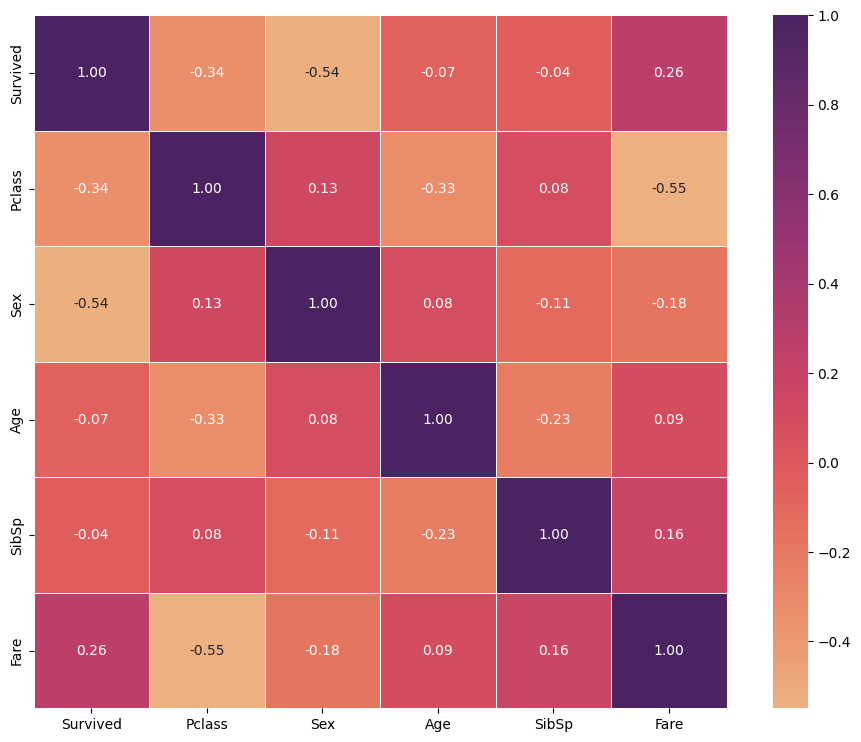

In [143]:
import seaborn as sns
import numpy as np

plt.figure(figsize=(12, 9))

corr = data.corr()

sns.heatmap(corr,annot=True,linewidths=.5,fmt= '.2f',\
            mask = np.zeros_like(corr, dtype=bool), \
            cmap = sns.color_palette('flare', as_cmap=True), square=True)

In [144]:
y = data.Survived
X = data.drop('Survived', axis=1)

In [145]:
cat_features = list(range(0, X.shape[1]))
print(cat_features)

[0, 1, 2, 3, 4]


In [146]:
print('Labels: {}'.format(set(y)))
print('Zero count = {}, One count = {}'.format(len(y) - sum(y), sum(y)))

Labels: {0, 1}
Zero count = 549, One count = 342


In [147]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X, y, train_size=0.8, random_state=1234)

In [149]:
# решила использовать CatBoost
from catboost import CatBoostClassifier
model = CatBoostClassifier(
    iterations=5,
    learning_rate=0.1,
)
model.fit(
    X_train, y_train,
    #cat_features=cat_features,
    eval_set=(X_validation, y_validation),  
    verbose=False # T many comments F no comments
)
print('Model is fitted: ' + str(model.is_fitted()))
print('Model params:')
print(model.get_params())

Model is fitted: True
Model params:
{'iterations': 5, 'learning_rate': 0.1}


In [151]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(
    iterations=150,
#     verbose=5,
)
model.fit(
    X_train, y_train,
    #cat_features=cat_features,
    eval_set=(X_validation, y_validation),
    verbose = 3, # уровень подробностей
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.066508
0:	learn: 0.6733727	test: 0.6705745	best: 0.6705745 (0)	total: 911us	remaining: 136ms
3:	learn: 0.6123027	test: 0.6062358	best: 0.6062358 (3)	total: 3.89ms	remaining: 142ms
6:	learn: 0.5675759	test: 0.5603013	best: 0.5603013 (6)	total: 6.1ms	remaining: 125ms
9:	learn: 0.5338560	test: 0.5266767	best: 0.5266767 (9)	total: 9.05ms	remaining: 127ms
12:	learn: 0.5059162	test: 0.5010461	best: 0.5010461 (12)	total: 12.6ms	remaining: 133ms
15:	learn: 0.4845316	test: 0.4820618	best: 0.4820618 (15)	total: 15.8ms	remaining: 133ms
18:	learn: 0.4678917	test: 0.4660655	best: 0.4660655 (18)	total: 18.9ms	remaining: 130ms
21:	learn: 0.4548963	test: 0.4531888	best: 0.4531888 (21)	total: 24.4ms	remaining: 142ms
24:	learn: 0.4428451	test: 0.4429453	best: 0.4429453 (24)	total: 28.2ms	remaining: 141ms
27:	learn: 0.4340820	test: 0.4353780	best: 0.4353780 (27)	total: 31.9ms	remaining: 139ms
30:	learn: 0.4273304	test: 0.4292584	best: 0.4292584 (30)	total: 35.2ms	remaining: 135ms
3

In [155]:
# кросс-валидация
from catboost import cv

params = {}
params['loss_function'] = 'Logloss'
params['iterations'] = 85
params['custom_loss'] = 'AUC'
params['random_seed'] = 63
params['learning_rate'] = 0.1

cv_data = cv(
    params = params,
    pool = Pool(X, label=y),
    fold_count=5,
    shuffle=True,
    partition_random_seed=0,
    stratified=False,
    verbose=False,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.4403306454
bestIteration = 24

Training on fold [1/5]

bestTest = 0.3394976792
bestIteration = 35

Training on fold [2/5]

bestTest = 0.3893512079
bestIteration = 33

Training on fold [3/5]

bestTest = 0.4881792394
bestIteration = 12

Training on fold [4/5]

bestTest = 0.42027042
bestIteration = 35



In [156]:
cv_data.head()

,iterations,test-Logloss-mean,test-Logloss-std,train-Logloss-mean,train-Logloss-std,test-AUC-mean,test-AUC-std
0,0,0.640491,0.003886,0.640077,0.002594,0.822791,0.045081
1,1,0.594229,0.009267,0.590005,0.008149,0.839086,0.044401
2,2,0.556906,0.013559,0.549542,0.009783,0.855216,0.050239
3,3,0.528838,0.018535,0.518058,0.010388,0.851642,0.056061
4,4,0.514702,0.017972,0.502344,0.013025,0.850084,0.055508


Кажется, с CatBoost качество улучшилось